In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [37]:
path_hash = "C:/Users/chi12/Downloads/hw4-bundle.tar/q4/data/hash_params.txt"
path_word = "C:/Users/chi12/Downloads/hw4-bundle.tar/q4/data/words_stream_tiny.txt"
path_word_freq = "C:/Users/chi12/Downloads/hw4-bundle.tar/q4/data/counts_tiny.txt"

hash_f = np.matrix(np.loadtxt(path_hash, delimiter = '\t'))
x = np.loadtxt(path_word)
word_freq = np.loadtxt(path_word_freq)

In [31]:
def hash_fun_to_dict(a, b, p, n_buckets, x, dict_h):
    for i in range(len(x)):
        y = x[i] % p
        hash_val = (a*y + b) % p
        pos = hash_val % n_buckets
        dict_h[pos] = dict_h.get(pos, 0) + 1
    return dict_h

def hash_fun(a, b, p, n_buckets, x):
    y = x % p
    hash_val = (a*y + b) % p
    return hash_val % n_buckets

# def find_hash_pos(a, b, p, n_buckets, x):
#     y = x % p
#     hash_val = (a*y + b) % p
#     return hash_val % n_buckets

def get_hash(target, hash_f):
    return hash_f[target, 0], hash_f[target, 1]

def rel_error(Ftelda, F):
    return (Ftelda-F)/F

def get_Ftelda(buckets, target):
    min_count = pow(10,5)  # assign a super big number
    for i in range(hash_f.shape[0]):
        a, b = (hash_f[i, 0], hash_f[i, 1])
        pos = hash_fun(a, b, p, n_buckets, target)
        if min_count > buckets[i][pos]:
            min_count = buckets[i][pos]
    return min_count

In [15]:
p = 123457
epsilon = math.e * pow(10, -4)
delta = pow(math.e, -5)
n_buckets = math.ceil(math.e/epsilon)

hsd1 = dict()
hsd2 = dict()
hsd3 = dict()
hsd4 = dict()
hsd5 = dict()
actual_d = dict()

buckets = [hsd1, hsd2, hsd3, hsd4, hsd5]

for i in range(hash_f.shape[0]):
    a, b = get_hash(i, hash_f)
    hash_fun_to_dict(a, b, p, n_buckets, x, buckets[i])
    
    
for k in range(len(x)):
    actual_d[x[k]] = actual_d.get(x[k], 0) + 1

In [29]:
Ftelda = get_Ftelda(buckets, 2)
F = actual_d[2]
rel_error(Ftelda, F)

100000 4107
4107 4108
4107 4155
4107 4188
4107 4339


0.008347655290940338

In [32]:
relError = [(1, rel_error(get_Ftelda(buckets, 1), actual_d[1]))]

for i in range(2, len(actual_d)):
    relError.append((i, rel_error(get_Ftelda(buckets, i), actual_d[i])))


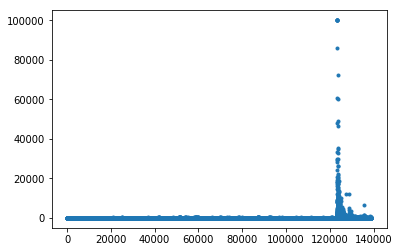

In [35]:
plt.plot(*zip(*relError), ".")
plt.show()

In [36]:
relError

[(1, 0.0032550181529858533),
 (2, 0.008347655290940338),
 (3, -0.2999992999993),
 (4, 0.025755879059350503),
 (5, 0.019875070982396367),
 (6, -0.5912177215293363),
 (7, 0.16494845360824742),
 (8, 0.02431222008957134),
 (9, -0.5048401871704092),
 (10, 0.0025552574421873002),
 (11, 0.0005684668115699716),
 (12, 0.11440677966101695),
 (13, -0.4253368962445766),
 (14, 0.007043803653973145),
 (15, 0.15625),
 (16, 0.3433734939759036),
 (17, 0.004139488208730557),
 (18, 0.0010467166152490085),
 (19, 0.17582417582417584),
 (20, 0.019524617996604415),
 (21, 0.0012212398026476478),
 (22, 0.009215686274509804),
 (23, 0.0004609660531428007),
 (24, 0.008467023172905526),
 (25, -0.019136644074114036),
 (26, 0.07062146892655367),
 (27, 0.002035508311658939),
 (28, 2.3636363636363638),
 (29, 1.4210526315789473),
 (30, 0.04129793510324484),
 (31, 6.666666666666667),
 (32, 0.13821138211382114),
 (33, 0.8461538461538461),
 (34, 0.00040623041389075884),
 (35, 0.13740458015267176),
 (36, 0.1888111888111888